In [4]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import BatchNormalization

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.14.0
Eager mode:  True
Hub version:  0.15.0
GPU is NOT AVAILABLE


In [6]:
import pandas as pd

df = pd.read_csv('mydata.csv')

FileNotFoundError: ignored

In [ ]:
df = df[['Year', 'Winner', 'Loser', 'Difference']]

In [7]:
# Create a sample dataset
np.random.seed(42)

data = {
    'Team1': df['Winner'],
    'Team2': df['Loser'],
    'Points_Won_By': df['Difference']
}

df = pd.DataFrame(data)

NameError: ignored

In [ ]:
# Label encoding for team names
team_encoder = LabelEncoder()
df['Team1'] = team_encoder.fit_transform(df['Team1'])
df['Team2'] = team_encoder.transform(df['Team2'])

# Split data into features and labels
X = df[['Team1', 'Team2']].values
y = df['Points_Won_By'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(df['Team1'])
print(df['Team2'])

0      45
1      45
2      65
3      37
4      65
       ..
585    60
586    45
587    14
588    61
589    19
Name: Team1, Length: 590, dtype: int64
0      65
1      14
2      37
3      67
4      78
       ..
585    48
586    65
587    60
588    21
589    48
Name: Team2, Length: 590, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.reshape(-1,1))

In [ ]:
max_team_index = max(df['Team1'].max(), df['Team2'].max()) + 1
# Define the model
###
model = Sequential()
model.add(Embedding(input_dim=max_team_index, output_dim=10, input_length=2))  # Embedding layer for team names
model.add(LSTM(2, activation='relu'))
model.add(Dense(1))

#model = tf.keras.Sequential([
#    tf.keras.layers.Embedding(input_dim=max_team_index, output_dim=2, input_length=2),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(3, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])

# Compile the model
#optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train_scaled, epochs=25, batch_size=32, validation_data=(X_test, y_test_scaled))

Epoch 1/25
15/15 [==============================] - 4s 25ms/step - loss: 1.0006 - val_loss: 1.0510
Epoch 2/25
15/15 [==============================] - 0s 7ms/step - loss: 0.9996 - val_loss: 1.0526
Epoch 3/25
15/15 [==============================] - 0s 6ms/step - loss: 0.9992 - val_loss: 1.0536
Epoch 4/25
15/15 [==============================] - 0s 5ms/step - loss: 0.9990 - val_loss: 1.0553
Epoch 5/25
15/15 [==============================] - 0s 7ms/step - loss: 0.9986 - val_loss: 1.0564
Epoch 6/25
15/15 [==============================] - 0s 7ms/step - loss: 0.9981 - val_loss: 1.0578
Epoch 7/25
15/15 [==============================] - 0s 5ms/step - loss: 0.9977 - val_loss: 1.0594
Epoch 8/25
15/15 [==============================] - 0s 7ms/step - loss: 0.9976 - val_loss: 1.0604
Epoch 9/25
15/15 [==============================] - 0s 6ms/step - loss: 0.9972 - val_loss: 1.0627
Epoch 10/25
15/15 [==============================] - 0s 8ms/step - loss: 0.9968 - val_loss: 1.0638
Epoch 11/25
15/15 

In [ ]:
# new model with more layers and stuff for final

# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import LearningRateScheduler
max_team_index = max(df['Team1'].max(), df['Team2'].max()) + 1
# def lr_scheduler(epoch, lr):
#     return lr * 0.9  # Adjust the factor based on your needs
model = Sequential()
model.add(Embedding(input_dim=max_team_index, output_dim=10, input_length=2))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='mse')
# schedule = LearningRateScheduler(lr_scheduler)
# Compile the model
#optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train_scaled, epochs=25, batch_size=32, validation_data=(X_test, y_test_scaled))

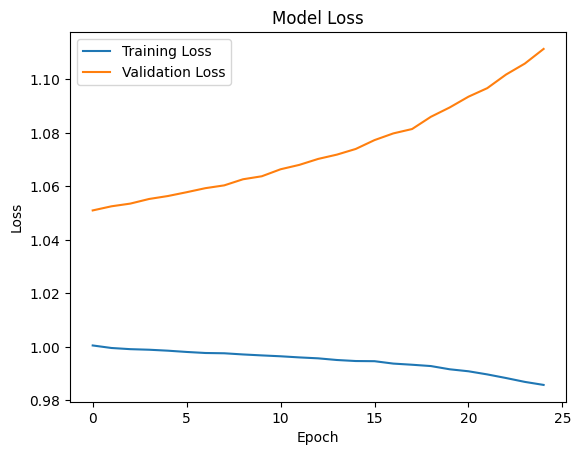

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss = model.evaluate(X_test, y_test_scaled)

print(f"Mean Squared Error on Testing Set: {loss}")

4/4 [==============================] - 0s 5ms/step - loss: 1.0785
Mean Squared Error on Testing Set: 1.0784928798675537


In [ ]:
#predictions = model.predict([[0,1]])
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to get the original scale
predictions_original_scale = scaler.inverse_transform(predictions)

# Display a few predicted values
for i in range(30):  # Displaying the first 5 predictions
    print(f"Predicted Point Difference: {predictions_original_scale[i]}, Actual Point Difference: {y_test_scaled[i]}")


4/4 [==============================] - 0s 4ms/step
Predicted Point Difference: [-0.218284], Actual Point Difference: [-0.42963899]
Predicted Point Difference: [-0.04432403], Actual Point Difference: [0.45590513]
Predicted Point Difference: [0.00344954], Actual Point Difference: [-2.20072723]
Predicted Point Difference: [-0.22462888], Actual Point Difference: [0.01313307]
Predicted Point Difference: [-0.0944729], Actual Point Difference: [1.78422131]
Predicted Point Difference: [-0.09335756], Actual Point Difference: [0.45590513]
Predicted Point Difference: [-0.06462092], Actual Point Difference: [-0.87241105]
Predicted Point Difference: [-0.00439357], Actual Point Difference: [0.01313307]
Predicted Point Difference: [-0.03410093], Actual Point Difference: [-0.42963899]
Predicted Point Difference: [-0.11633775], Actual Point Difference: [0.89867719]
Predicted Point Difference: [-0.15058497], Actual Point Difference: [-1.75795517]
Predicted Point Difference: [-0.04876748], Actual Point D

In [ ]:
print(team_encoder.inverse_transform([57]))

['PSV Eindhoven']


In [ ]:
import random

In [ ]:
winsPred = []
teamMatches = random.sample(range(0, 91), 30)
print(teamMatches)

[62, 37, 56, 89, 55, 30, 74, 34, 66, 31, 52, 8, 0, 17, 70, 19, 24, 5, 36, 14, 20, 46, 82, 77, 84, 26, 47, 53, 3, 12]


In [ ]:
#Steaua Bucaresti
wins = 0
for i in teamMatches:
  if (i != 81):
    prediction = scaler.inverse_transform(model.predict([[81,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Red Star
wins = 0
for i in teamMatches:
  if (i != 67):
    prediction = scaler.inverse_transform(model.predict([[67,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Real Madrid
wins = 0
for i in teamMatches:
  if (i != 65):
    prediction = scaler.inverse_transform(model.predict([[65,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#PSV Eindhoven
wins = 0
for i in teamMatches:
  if (i != 57):
    prediction = scaler.inverse_transform(model.predict([[57,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Porto
wins = 0
for i in teamMatches:
  if i != 61:
    prediction = scaler.inverse_transform(model.predict([[61,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Marseille
wins = 0
for i in teamMatches:
  if i != 50:
    prediction = scaler.inverse_transform(model.predict([[50,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

14


In [ ]:
#Manchester United
wins = 0
for i in teamMatches:
  if i != 49:
    prediction = scaler.inverse_transform(model.predict([[49,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

14


In [ ]:
#Liverpool
wins = 0
for i in teamMatches:
  if i != 45:
    prediction = scaler.inverse_transform(model.predict([[45,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Juventus
wins = 0
for i in teamMatches:
  if i != 38:
    prediction = scaler.inverse_transform(model.predict([[38,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Internazionale
wins = 0
for i in teamMatches:
  if i != 37:
    prediction = scaler.inverse_transform(model.predict([[37,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Hamburg
wins = 0
for i in teamMatches:
  if i != 36:
    prediction = scaler.inverse_transform(model.predict([[36,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Chelsea
wins = 0
for i in teamMatches:
  if i != 21:
    prediction = scaler.inverse_transform(model.predict([[21,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Borussia Dortmund
wins = 0
for i in teamMatches:
  if i != 19:
    prediction = scaler.inverse_transform(model.predict([[19,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

13


In [ ]:
#Bayern Munich
wins = 0
for i in teamMatches:
  if i != 14:
    prediction = scaler.inverse_transform(model.predict([[14,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

13


In [ ]:
#Barcelona
wins = 0
for i in teamMatches:
  if i != 12:
    prediction = scaler.inverse_transform(model.predict([[12,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Aston Villa
wins = 0
for i in teamMatches:
  if i != 6:
    prediction = scaler.inverse_transform(model.predict([[6,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
#Ajax
wins = 0
for i in teamMatches:
  if i != 2:
    prediction = scaler.inverse_transform(model.predict([[2,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

14


In [ ]:
#AC Milan
wins = 0
for i in teamMatches:
  if i != 0:
    prediction = scaler.inverse_transform(model.predict([[0,i]], verbose=0))
    if (prediction > 0):
        wins += 1
print(wins)
winsPred.append(wins)

0


In [ ]:
print(winsPred)

[0, 0, 0, 0, 0, 14, 14, 0, 0, 0, 0, 0, 13, 13, 0, 0, 14, 0]


In [ ]:
np.array(winsPred) / 3

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       4.66666667, 4.66666667, 0.        , 0.        , 0.        ,
       0.        , 0.        , 4.33333333, 4.33333333, 0.        ,
       0.        , 4.66666667, 0.        ])